<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/cfproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Harmonic functions for movie animation
* A first draft of a Google Coab notebook for
  the Complex functions course projects
* This is just a proof of concept and ideas that can
  be used for helping the students with this project
* Some of the stuff is meant for the instructors and may
  not be passed to students
* The intention is to start a discussion on what we need
  to present to the students.
* The **cfclon** project (suggested short name) is in the
  context of an an undergraduate course on comple functions,
  and its purpose is to demonstrate how theoretical topic
  such as "Harmonic Functions" is practically used in the
  graphical movies industery (such as **Pixar**)
* Relavant papers:
  * https://www.ams.org/publicoutreach/feature-column/fcarc-harmonic
  * https://graphics.pixar.com/library/HarmonicCoordinates/paper.pdf
  * https://www.cs.jhu.edu/~misha/Fall07/Papers/Joshi07.pdf
  * https://www.cs.huji.ac.il/~danix/mvclone/files/mvc-final-opt.pdf

## Installation
* Run the following cell to install **cfclon**.

In [1]:
%pip install https://samyzaf.com/cfclon.tar.gz

  Preparing metadata (setup.py) ... done
  Created wheel for cfclon: filename=cfclon-0.14-py3-none-any.whl size=4180 sha256=83df3b444e9f91248b285f8123c4eaf09596964279057070b5e9939ab9d61a7d
  Stored in directory: /tmp/pip-ephem-wheel-cache-vh8966iw/wheels/de/c2/cc/a69b2ca7d7dd619d12f3f64235c2498c021e46ce080b751478
Successfully built cfclon


## Importing **cfclon**

In [2]:
from cfclon import *

## Overview
* Animation characters such as **Pixar Animation Studio**
  [Ratatouille](https://www.imdb.com/title/tt0382932/)
  or
  [Remy](https://www.youtube.com/watch?v=3YG4h5GbTqU)
  are modeled as a 3d geometric mesh that consists of 5000
  to 9000 points in the grid (usually a triangular mesh model, but also rectangular grids are common).

* Animating a 9000 points mesh is practically
  impossible algorithmically or computationaly

* The common method for animating a 9000 mesh character
  is by enclosing it within a simple **cage** (which usually
  consists of 100 or 150 contrl points) which is easier to
  manipulate and maneuver (for example by a real person
  with a special suit that records his movements).

* To move the character we only need to reposition the 100
  (roughly) control points of the cage to the desired
  pose and deploy an algorithm by which we move
  the 9000 mesh points of our character

* This algorithm must be computationaly efficient but must
  must not cause any distortion

* The action of deforming our character from the old cage to
  the new cage is called **image cloning**.





<IMG src="https://samyzaf.com/cfproj/group1.jpg" width=800 align="center"/>


* Due to the high complexity of the 3D case, this project
  is restricted to the two dimensional case.

* The two main methods for acomplishing this scheme
  are
  1. *Gradient domain techniques* (such as
  the *Poisson cloning* method)
  2. *Coordinate-based techniques* which use the cage
     for defining a coordinate system tha
     coordinate system

* The first method is very heavy computationally and
  thus less and less popular, while the second gained more
  momentum as it is much faster and generates more
  pleasing deformations to the character.

* We will present the three main techniques of the second
  method, but most of the effort will fall on
  the third technique which deploys Harmonic functions:
  1. Barycentric coordinates
  2. Mean value coordinates
  3. Harmonic coordinates

* The following YouTube video contains more details about
  this method
  * https://www.youtube.com/watch?v=egf4m6zVHUI
* You can also play it here if you entered the
  Google Colab mode.

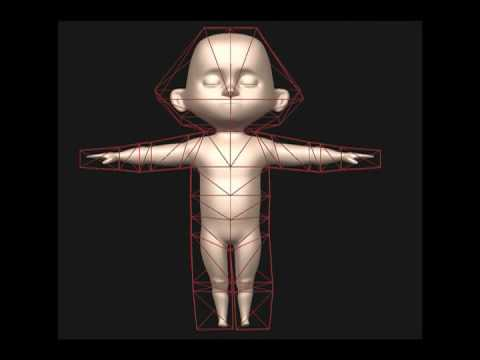

In [3]:
YouTubeVideo("egf4m6zVHUI", width=720, height=480)

## Barycentric Coordinates
* A linear transformatio which maps every point
  $(x,y)$ in the 2-dimensional plane $\mathbb{R}^2$
  to $(\beta_1(x,y), \beta_2(x,y), \beta_3(x,y))$

* All these three functions must be linear

The barycentric coordinates of (6, 4) = [0.14285714 0.53571429 0.32142857]


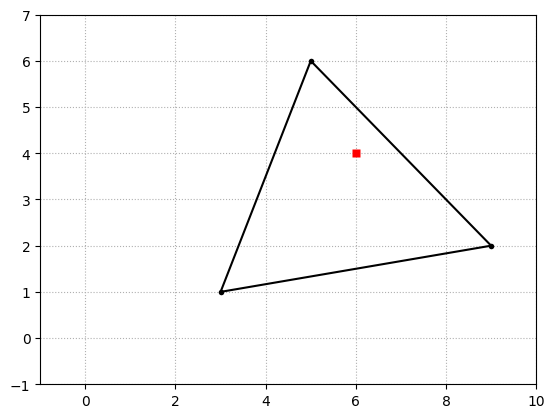

In [3]:
cage1 = [(3,1), (5,6), (9,2)]
bary_map = bary_coords_map(cage1)
x1,y1 = 6,4
coords = bary_map(x1, y1)
print(f"The barycentric coordinates of {(x1,y1)} = {coords}")
draw_cage(cage1)
draw_point(x1, y1, color="red")

clone point = (9.214285714285712, 6.1428571428571415)


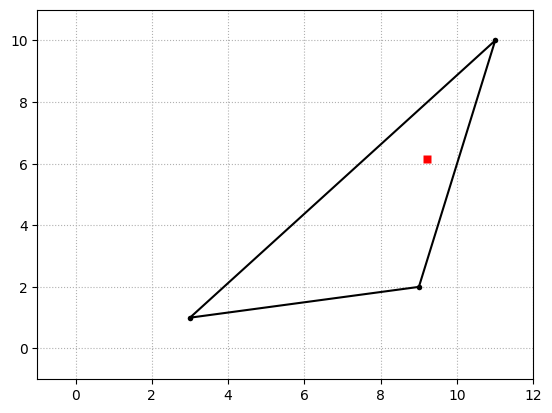

In [4]:
cage2 = [(3,1), (11,10), (9,2)]
x2,y2 = clone(coords, cage2)
print(f"clone point = ({x2}, {y2})")
draw_cage(cage2)
draw_point(x2, y2, color="red")

In [8]:
def clone(coords, cage):
    point = tuple(np.dot(coords, cage))
    return point

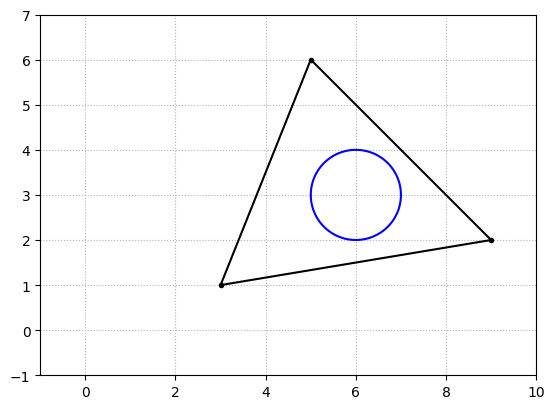

In [9]:
cage1 = [(3,1), (5,6) ,(9,2)]
draw_cage(cage1)
circle_points = draw_ellipse(6,3,1,1)
bary_map = bary_coords_map(cage1)
coords_list = [bary_map(x,y) for x,y in circle_points]

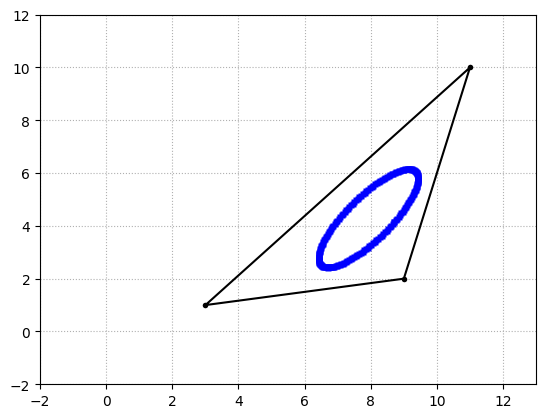

In [10]:
cage2 = [(3,1), (11,10), (9,2)]
draw_cage(cage2)
cloned_points = [clone(coords, cage2) for coords in coords_list]
draw_poly(cloned_points)

In [11]:
print(cloned_points)


[(8.714285714285715, 4.142857142857142), (8.758923069652507, 4.208120430996461), (8.802537435626409, 4.273479314406988), (8.845075079509662, 4.338853271245748), (8.886483595121149, 4.404161761099369), (8.926711967360578, 4.4693243242095), (8.965710635058851, 4.534260680598872), (9.003431552037197, 4.598890828975842), (9.039828246299837, 4.663135145295638), (9.074855877287273, 4.726914480856795), (9.108471291119645, 4.790150259812002), (9.140633073762125, 4.852764575973181), (9.171301602046796, 4.914680288791548), (9.200439092488235, 4.975821118394417), (9.228009647832572, 5.036111739561649), (9.253979301282762, 5.09547787452598), (9.2783160583455, 5.153846384482884), (9.30098993624831, 5.211145359697244), (9.321973000878174, 5.267304208095812), (9.34123940119622, 5.32225374223632), (9.358765401086096, 5.375926264546095), (9.374529408596757, 5.42825565072514), (9.38851200254364, 5.47917743121099), (9.400695956435477, 5.528628870604893), (9.411066259697261, 5.576549044961552), (9.4196101